In [1]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2020 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching packages ──────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ readr   2.0.2     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
✔ dplyr   1.0.7     

── Conflicts ─────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()



In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list
taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 
# Convert taxonomy info to data frame with correct taxonomy labels
#taxa <- taxa_16S[-1,]
select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n())
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11, 12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [62]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))


meta$Combo <- factor(meta$Combo, 
    levels = c("Ambient_Placebo", "Ambient_Pathogen", "NH4_Placebo", "NH4_Pathogen"))




In [4]:
head(ASVs)
head(meta)

,N1-Hom,N10-A019,N11-A153,N115-247,N12-A008,N13-A038,N14-A040,N15-A017,N157-265-R2,N16-A076,⋯,N92-A007,N93-A121,N94-A091,N95-215,N96-231,N97-205,N98-253,N99-A036,NTC-1,NTC-2
d4afb1713408228e4f326f956208c05d,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
670c1b99536ec05918fcabb39afe5c6a,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a98b7151854efbb8b6411cda35e3b7b5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1d3494a6d62290ca459dc8298cbe8ef2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
98def833ff31498c016ed2d17f9f75ee,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
cd56fcaee361534c78d1cd5dd8673f9d,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


,sample_names,feature.counts,Initial_sample_ID,Tag,Date_Collected,Replicate,Genotype,Nursery,Nutrients,Diseased,⋯,Sequencing_Round,Plate_Name,Plate_Barcode,Well_Position,Sequence_Name,Illumina5_Adapter,Forward_Primer_Pad,Golay_Barcode,X515FB_Forward_Primer,Primer_For_PCR
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
N5-FACs-R2,N5-FACs-R2,15770,5,FACs,19-Oct-20,NA,NA,NA,NA,Diseased,⋯,2,2,11705851,F01,515rcbc156,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,ATATGTTCTCAA,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTATATGTTCTCAATATGGTAATTGTGTGYCAGCMGCCGCGGTAA
N5-FACs,N5-FACs,23177,5,FACs,19-Oct-20,NA,NA,NA,NA,Diseased,⋯,2,2,11705851,B11,515rcbc118,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,CTACAGGGTCTC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA
N8-A060,N8-A060,25759,8,A060,24-Oct-20,NA,Acerv2,UM,NH4,Placebo,⋯,2,2,11705851,G11,515rcbc178,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,GTTTGAAACACG,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTGTTTGAAACACGTATGGTAATTGTGTGYCAGCMGCCGCGGTAA
N9-A048,N9-A048,45982,9,A048,25-Oct-20,NA,Acerv2,UM,NH4,Placebo,⋯,2,2,11705851,A01,515rcbc96,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,CTACAGGGTCTC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA
N70-A052,N70-A052,24607,70,A052,30-Oct-20,NA,Acerv2,UM,NH4,Placebo,⋯,1,1,11706365,E07,515rcbc54,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA
N60-A056,N60-A056,75497,60,A056,30-Oct-20,NA,Acerv2,UM,NH4,Placebo,⋯,1,1,11706365,C06,515rcbc29,AATGATACGGCGACCACCGAGATCTACACGCT,TATGGTAATT,AGCCTTCGTCGC,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA


In [64]:
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [65]:
ps=subset_samples(ps, !ID %in% c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125"))
ps= subset_samples(ps, Genotype!="U41")
ps
#ps= subset_samples(ps, Genotype!="U44")
#ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 257 samples ]
sample_data() Sample Data:       [ 257 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [66]:
#ps = subset_taxa(ps, Genus!=" g__MD3-55" )
#ps

In [67]:
ps_razor =subset_samples(ps, Type=="Razor")
ps_razor

ps_razor_nr =subset_taxa(ps_razor, Genus!="g__MD3-55" )
ps_razor_nr

ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped


ps_clip_nr =subset_taxa(ps_Clipped, Genus!="g__MD3-55" )
ps_clip_nr

ps_neg =subset_samples(ps, Type=="Neg")
ps_neg

#ps_homogenate =subset_samples(ps, Type=="Homogenate")
#ps_homogenate


#ps_cells =subset_samples(ps, Type=="Sorted_cells")
#ps_cells


#ps_neg_homo =subset_samples(ps, Type=="Neg" | Type=="Homogenate")
#ps_neg_homo




#ps_cells_homo =subset_samples(ps, Type=="Sorted_cells" | Type=="Homogenate")
#ps_cells_homo


ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_paired_DL = subset_samples(ps_Clipped, Pairs=="paired" | Health=="DL")
ps_paired_DL

ps_homo_paired_DL =subset_samples(ps, Health=="DL" & Diseased=="Pathogen")
ps_homo_paired_DL

ps_unpaired =subset_samples(ps_Clipped, Pairs=="unpaired")
ps_unpaired

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 7725 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 7725 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 7725 tips and 6818 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 126 samples ]
sample_data() Sample Data:       [ 126 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 127 samples ]
sample_data() Sample Data:       [ 127 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 54 samples ]
sample_data() Sample Data:       [ 54 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9710 taxa and 66 samples ]
sample_data() Sample Data:       [ 66 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 9710 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9710 tips and 8540 internal nodes ]

In [68]:
ps_fill_razor = filter_taxa(ps_razor, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor 
                            
ps_fill_razor_nr = filter_taxa(ps_razor_nr, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_razor_nr                          

ps_fill_clip = filter_taxa(ps_Clipped, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_clip
                           
ps_fill_clip_nr = filter_taxa(ps_clip_nr, function(x) sum(x > 5) > (0.001*length(x)), TRUE)
ps_fill_clip_nr                           

ps_fill_neg = filter_taxa(ps_neg, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_neg                         

ps_fill_homogenate = filter_taxa(ps_homogenate, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_homogenate

ps_fill_cells = filter_taxa(ps_cells, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_cells

ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 0) > (0.00*length(x)), TRUE)
ps_fill_pair     
                           
                           
ps_fill_pair = filter_taxa(ps_paired, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_pair  
                           
ps_fill_unpair = filter_taxa(ps_unpaired, function(x) sum(x > 5) > (0.01*length(x)), TRUE)
ps_fill_unpair                           

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 982 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 982 tips and 896 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 753 taxa and 60 samples ]
sample_data() Sample Data:       [ 60 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 753 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 753 tips and 710 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1913 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 1913 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1913 tips and 1604 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5521 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 5521 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5521 tips and 4881 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 245 taxa and 5 samples ]
sample_data() Sample Data:       [ 5 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 245 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 245 tips and 220 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 968 taxa and 7 samples ]
sample_data() Sample Data:       [ 7 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 968 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 968 tips and 946 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 253 taxa and 2 samples ]
sample_data() Sample Data:       [ 2 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 253 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 253 tips and 242 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6519 taxa and 126 samples ]
sample_data() Sample Data:       [ 126 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 6519 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 6519 tips and 5810 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1639 taxa and 126 samples ]
sample_data() Sample Data:       [ 126 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 1639 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1639 tips and 1389 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1872 taxa and 66 samples ]
sample_data() Sample Data:       [ 66 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 1872 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1872 tips and 1745 internal nodes ]

In [70]:
ps_clr_razor <- microbiome::transform(ps_fill_razor, 'clr')
psr_clr.ord_razor <- ordinate(ps_clr_razor, "RDA", "euclidean")

ps_clr_razor_nr <- microbiome::transform(ps_fill_razor_nr, 'clr')
psr_clr.ord_razor_nr <- ordinate(ps_clr_razor_nr, "RDA", "euclidean")



ps_clr_clip <- microbiome::transform(ps_fill_clip, 'clr')
psr_clr.ord_clip <- ordinate(ps_clr_clip, "RDA", "euclidean")


ps_clr_fill_pair <- microbiome::transform(ps_fill_pair, 'clr')
ps_clr.ord_fill_pair <- ordinate(ps_clr_fill_pair, "RDA", "euclidean")

ps_clr_fill_unpair <- microbiome::transform(ps_fill_unpair, 'clr')
ps_clr.ord_fill_unpair <- ordinate(ps_clr_fill_unpair, "RDA", "euclidean")

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 10. Consider
specifying shapes manually if you must have them.”


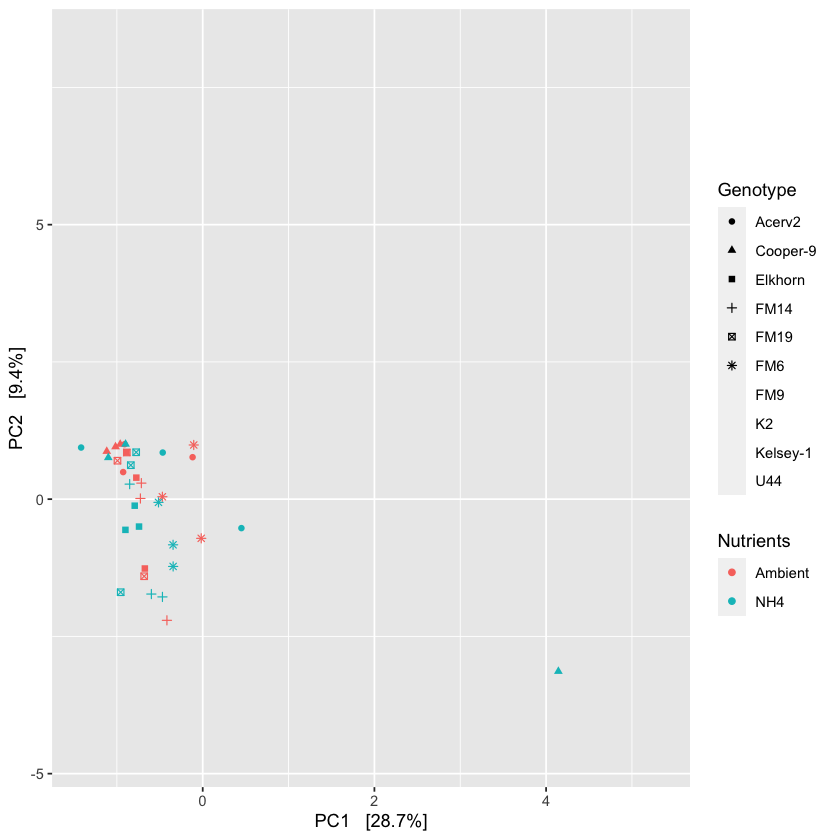

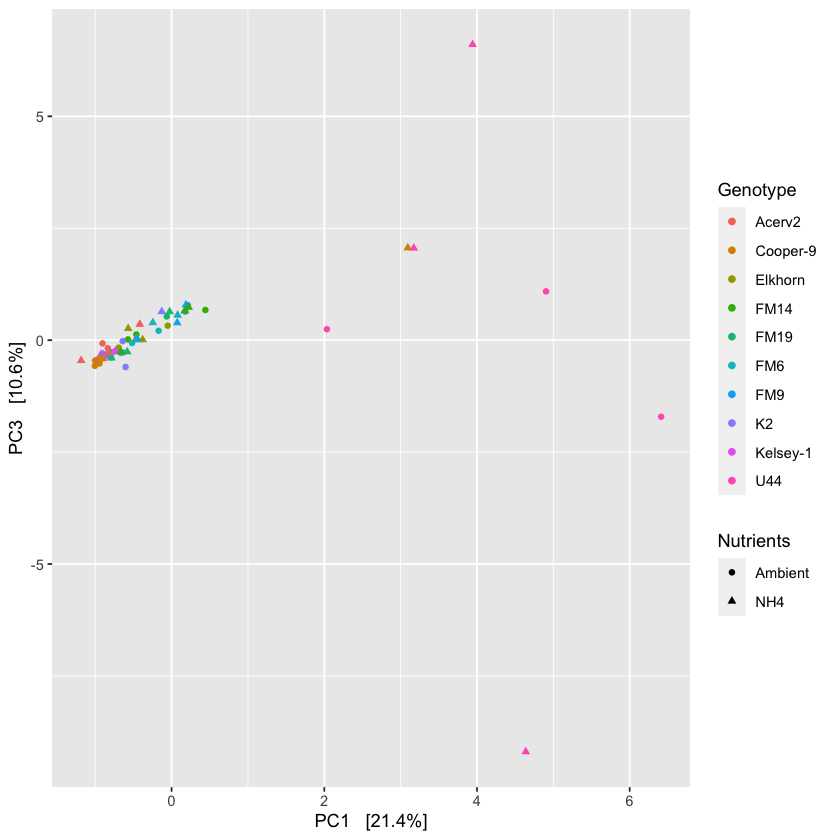

In [71]:
plot_ordination(ps_clr_razor, psr_clr.ord_razor,
                               color="Nutrients",
                              shape="Genotype",
                
                            axes = c(1,2)) 



plot_ordination(ps_clr_razor_nr, psr_clr.ord_razor_nr,
                               color="Genotype",
                              shape="Nutrients",
                
                            axes = c(1,3)) 


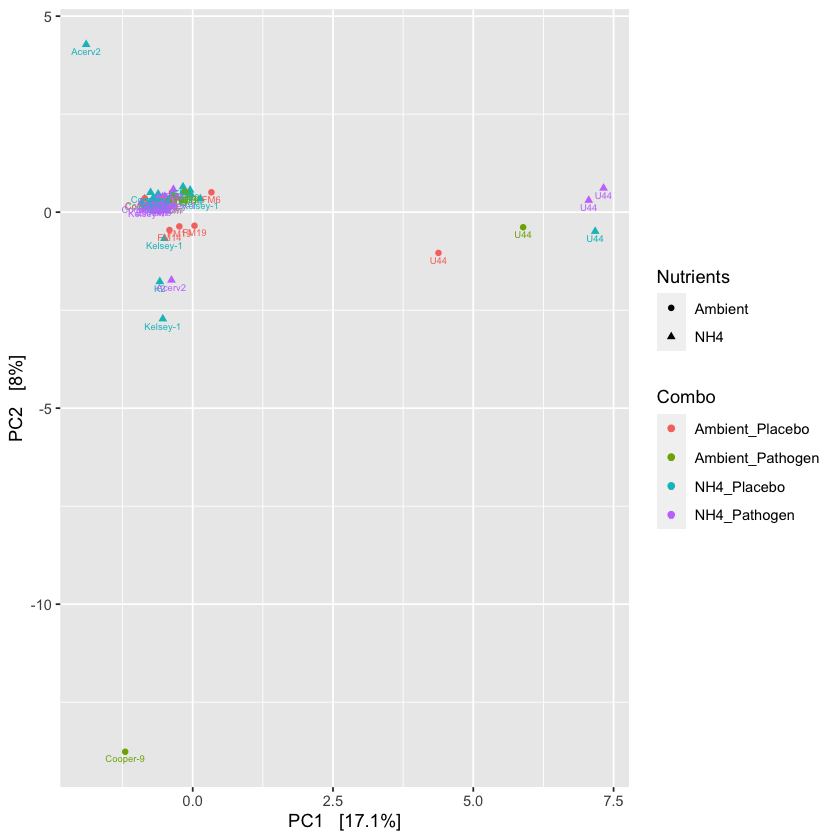

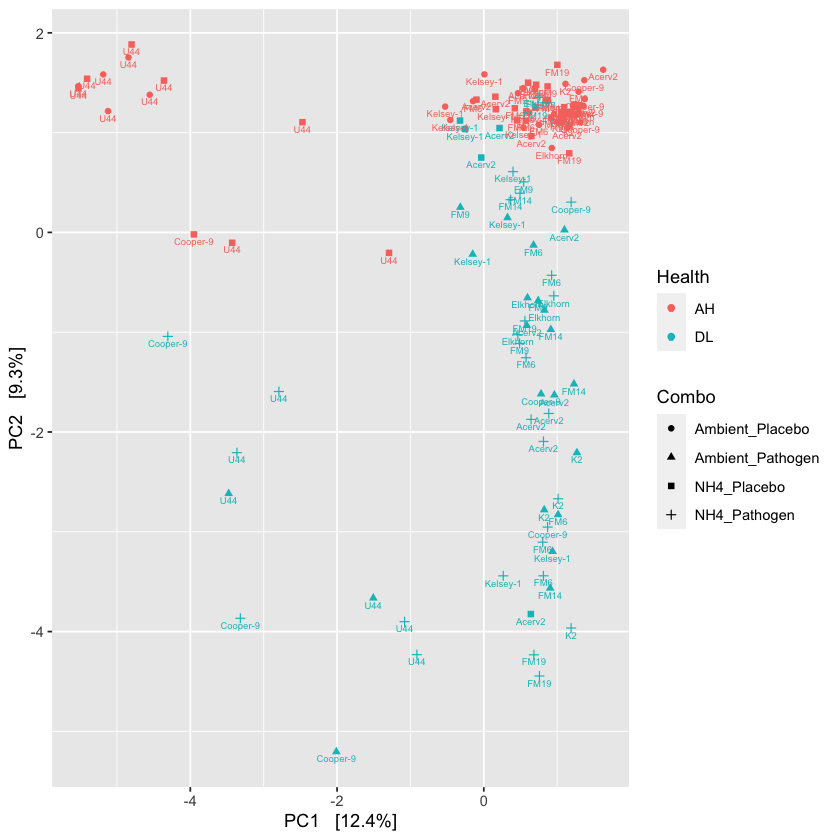

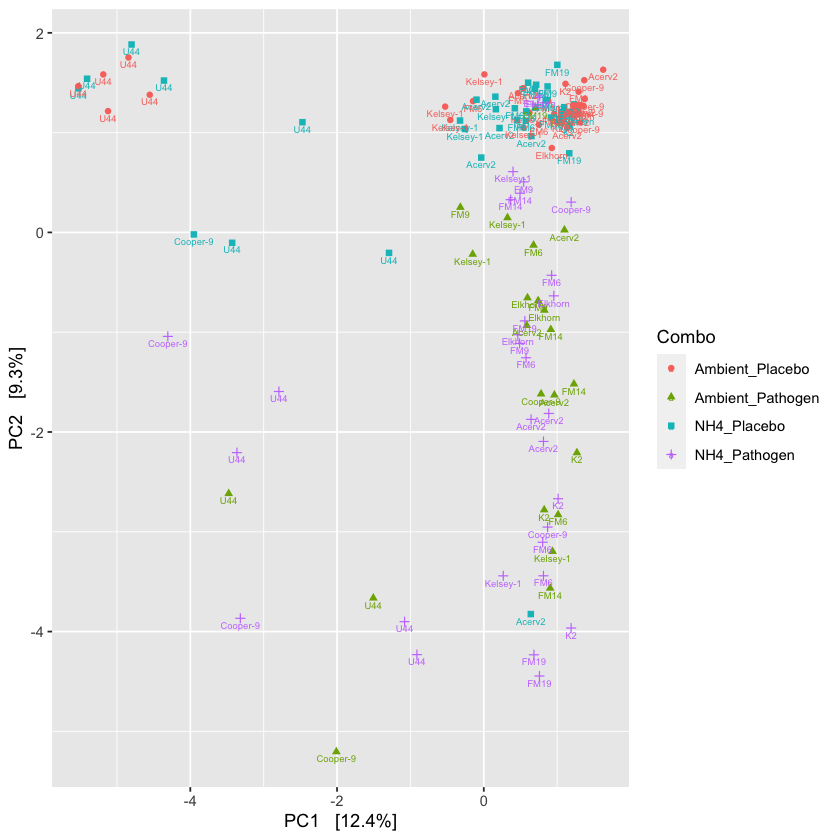

In [72]:
plot_ordination(ps_clr_fill_unpair, ps_clr.ord_fill_unpair,
                               color="Combo",
                              shape="Nutrients",
                               label="Genotype",
                            axes = c(1,2)) 


plot_ordination(ps_clr_fill_pair, ps_clr.ord_fill_pair,
                               color="Health",
                              shape="Combo",
                               label="Genotype",
                            axes = c(1,2)) 

plot_ordination(ps_clr_fill_pair, ps_clr.ord_fill_pair,
                               color="Combo",
                              shape="Combo",
                               label="Genotype",
                            axes = c(1,2)) 


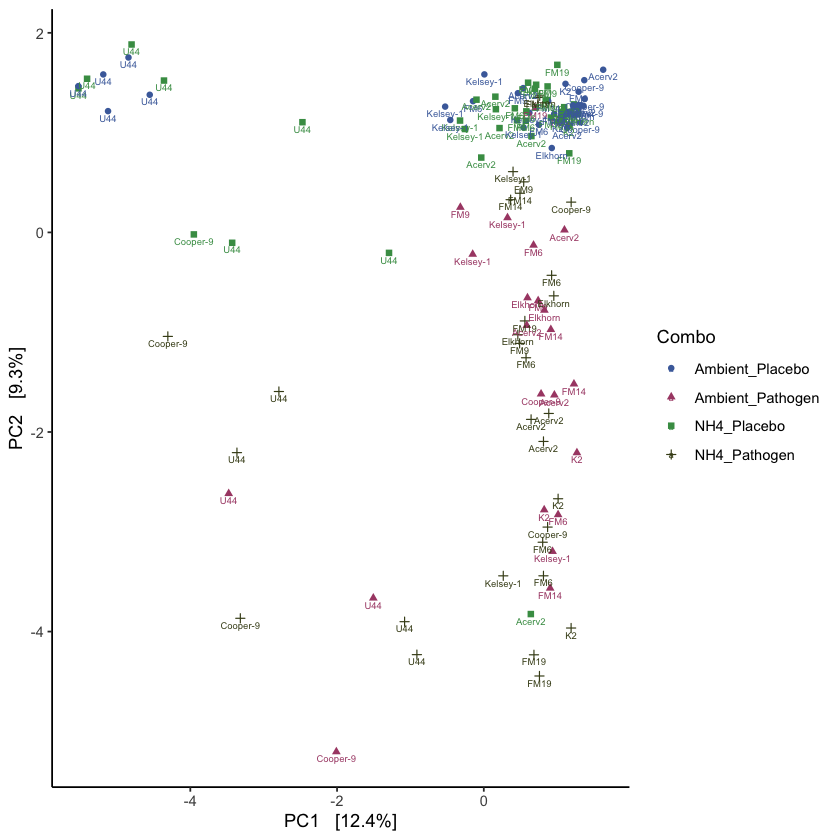

In [81]:
plot_ordination(ps_clr_fill_pair, ps_clr.ord_fill_pair,
                               color="Combo",
                              shape="Combo",
                               label="Genotype",
                            axes = c(1,2)) +
scale_color_manual(values = c("#4A6CAA", "#AA4A74", "#469B53" ,"#454B1B", "#AA4A74")) +
 
theme_classic() 

ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/Combo_PCA.png",
     width = 7, height = 7, units = "in")

Warning message in scores(ordination, choices = axes, display = "species", physeq = physeq):
“restarting interrupted promise evaluation”
Warning message in plot_ordination(ps_clr_fill_pair, psr_clr.ord_clip_n, color = "Diseased", :
“Could not obtain coordinates from the provided `ordination`. 
Please check your ordination method, and whether it is supported by `scores` or listed by phyloseq-package.”


NULL

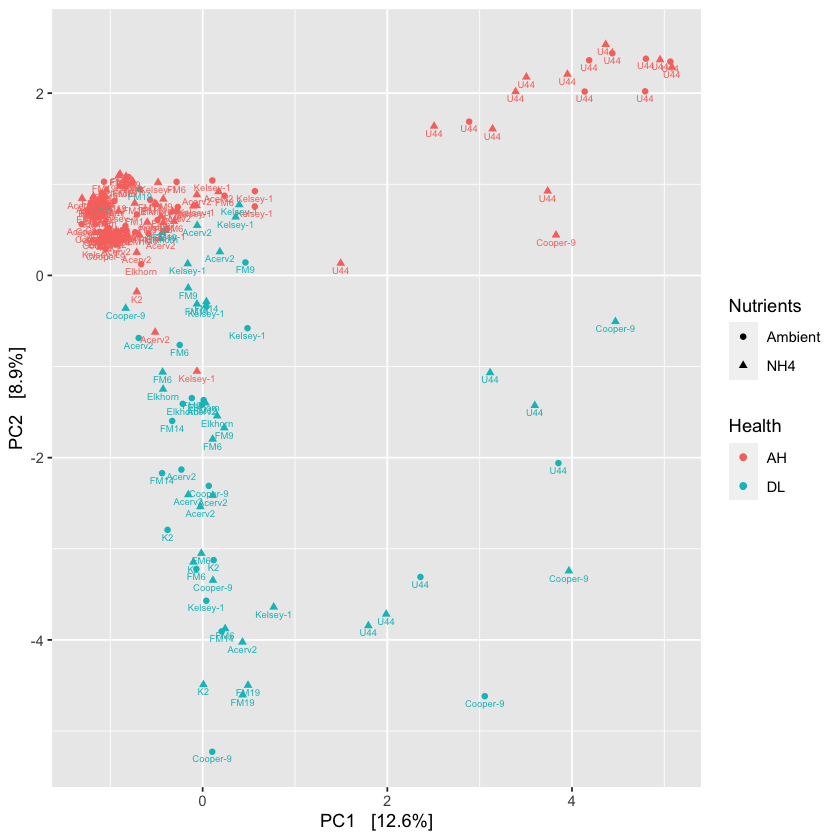

In [65]:
plot_ordination(ps_clr_fill_pair, psr_clr.ord_clip_n,
                               color="Diseased",
                              shape="Nutrients",
                               label="Genotype",
                            axes = c(1,2)) 


plot_ordination(ps_clr_clip, psr_clr.ord_clip,
                               color="Health",
                              shape="Nutrients",
                               label="Genotype",
                            axes = c(1,2)) 


In [82]:
sum_ps_neg   <- ps_fill_neg  %>%
  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

sum_ps_cell   <- ps_fill_cells  %>%
  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()


sum_ps_homogenate   <- 
ps_fill_homogenate  %>%
  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()


sum_ps_Clipped   <- ps_Clipped %>%
  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

sum_ps_pair   <- ps_fill_pair %>%
  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()


sum_ps_razor   <- ps_fill_razor %>%
  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()



In [67]:
sum_ps_neg_homo   <- ps_neg_homo %>%
  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

sum_ps_cells_homo   <- ps_cells_homo %>%
  #tax_glom(taxrank = "Family") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

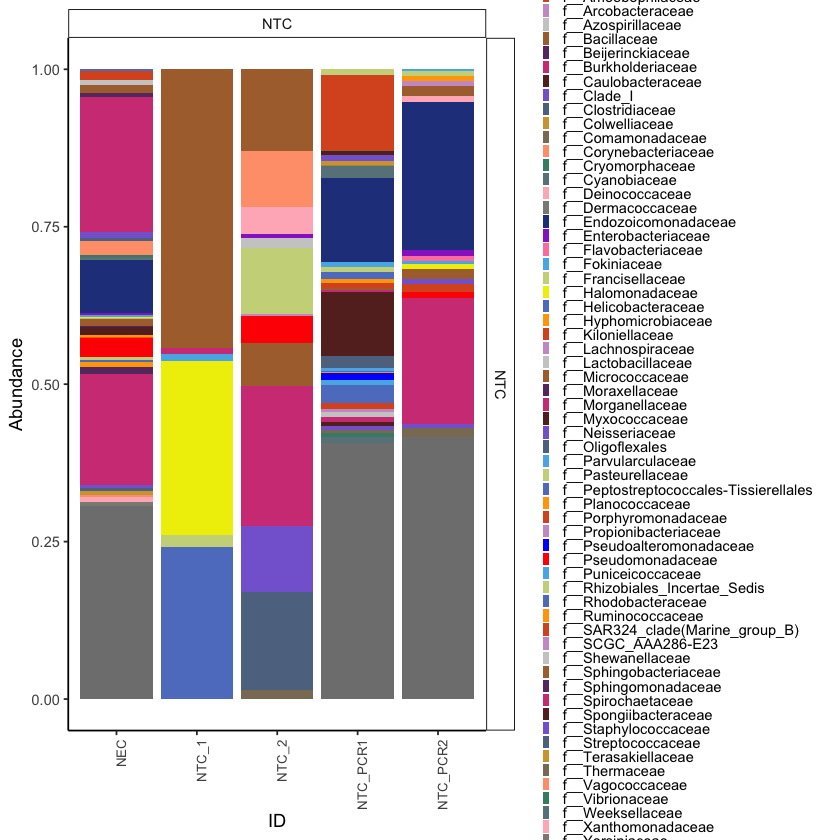

In [68]:
sum_ps_neg %>%
ggplot(aes(x =ID, y=Abundance, fill=Family)) + 
       
geom_bar(stat="identity", position="stack", aes(fill = Family)) + 
facet_grid(Nutrients~Diseased, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=8)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5))

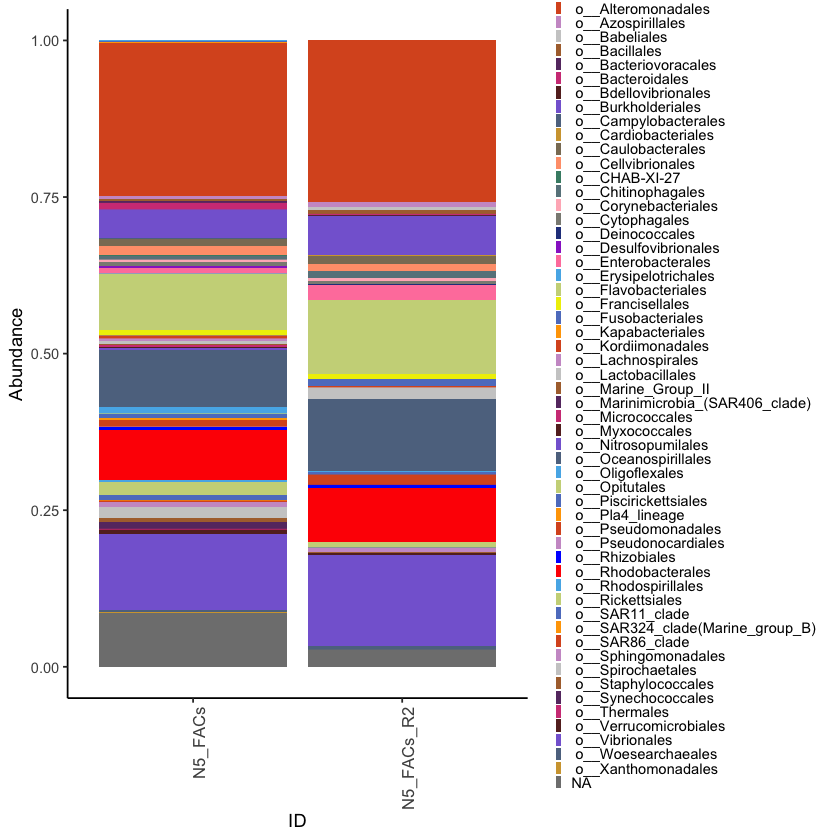

In [69]:
sum_ps_cell %>%
#filter(Abundance >= 0.001) %>%
ggplot( 
       aes(x =ID, y=Abundance, fill=Order)) + 
geom_bar(stat="identity",
         position="fill"
        ) +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red","#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5))

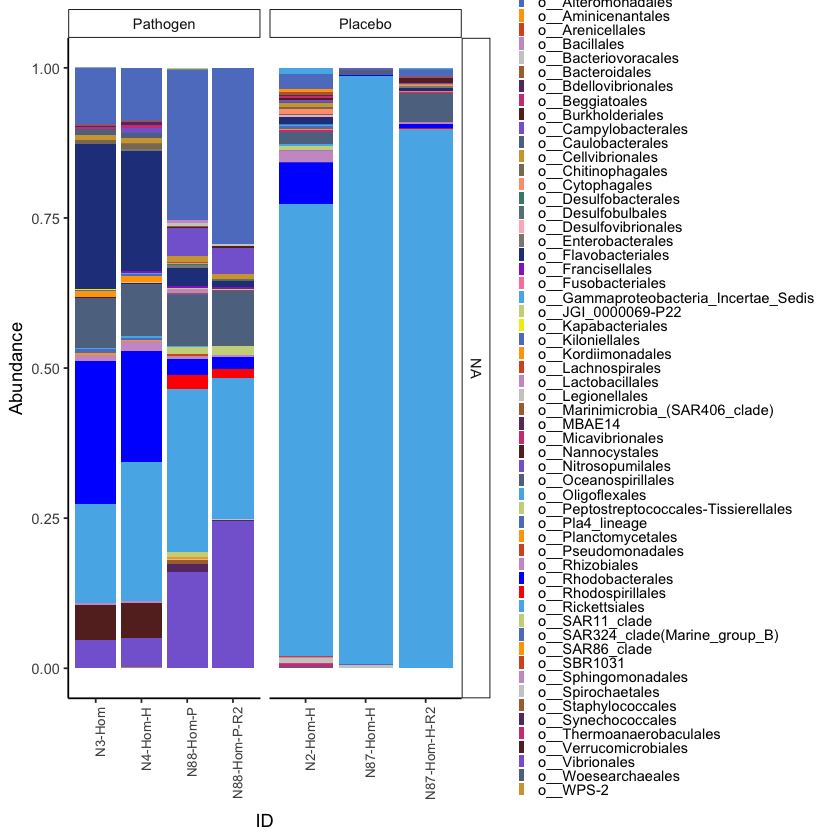

In [70]:
sum_ps_homogenate %>%
filter(Order!="Rickettsiales") %>%
filter(Abundance >= 0.001) %>%
ggplot( 
       aes(x =ID, y=Abundance, fill=Order)) + 
geom_bar(stat="identity",
         position="fill"
        ) +
facet_grid(Nutrients~Diseased, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=8)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5))

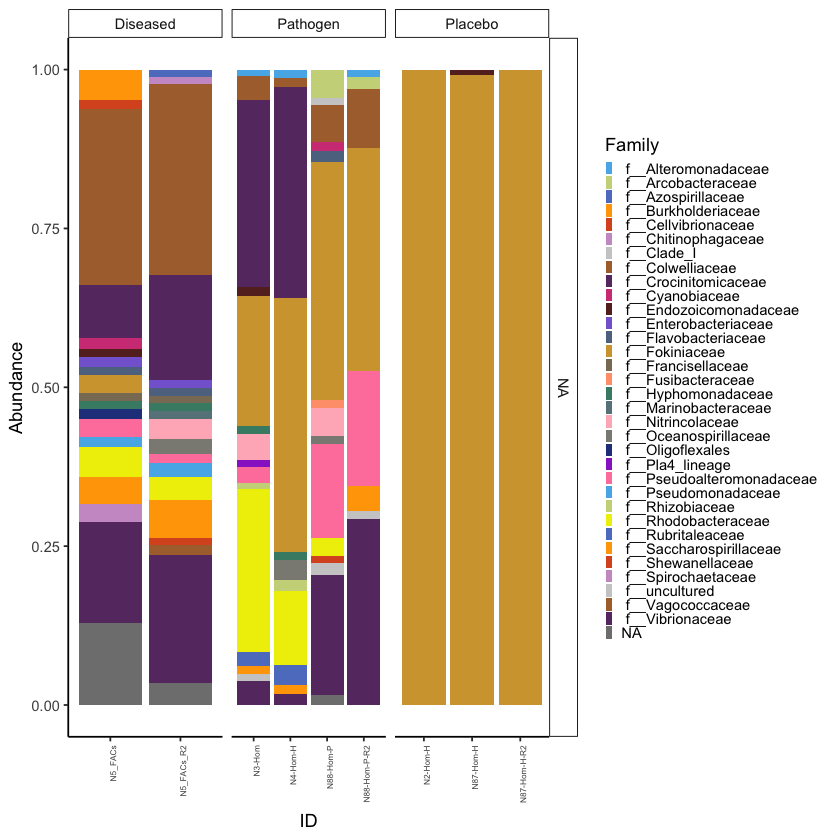

In [71]:
sum_ps_cells_homo %>%
#filter(Order!="Rickettsiales") %>%
filter(Abundance >= 0.007) %>%
ggplot( 
       aes(x =ID, y=Abundance, fill=Family)) + 
geom_bar(stat="identity",
         position="fill"
        ) +
facet_grid(Nutrients~Diseased, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.30, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=5)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5))

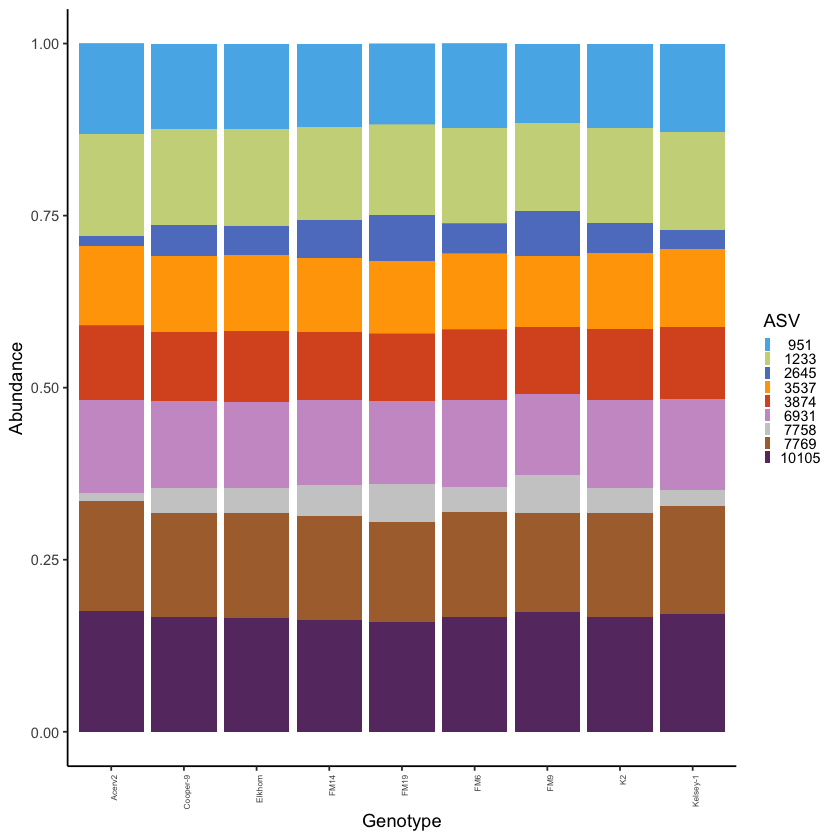

In [100]:
sum_ps_Clipped %>%
filter(Order==" o__Rickettsiales") %>%
filter(Abundance >= 0.01) %>%
ggplot( 
       aes(x =Genotype, y=Abundance, fill=ASV)) + 
geom_bar(stat="identity",
         position="fill"
        ) +
#facet_grid(Nutrients~Diseased, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=5)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

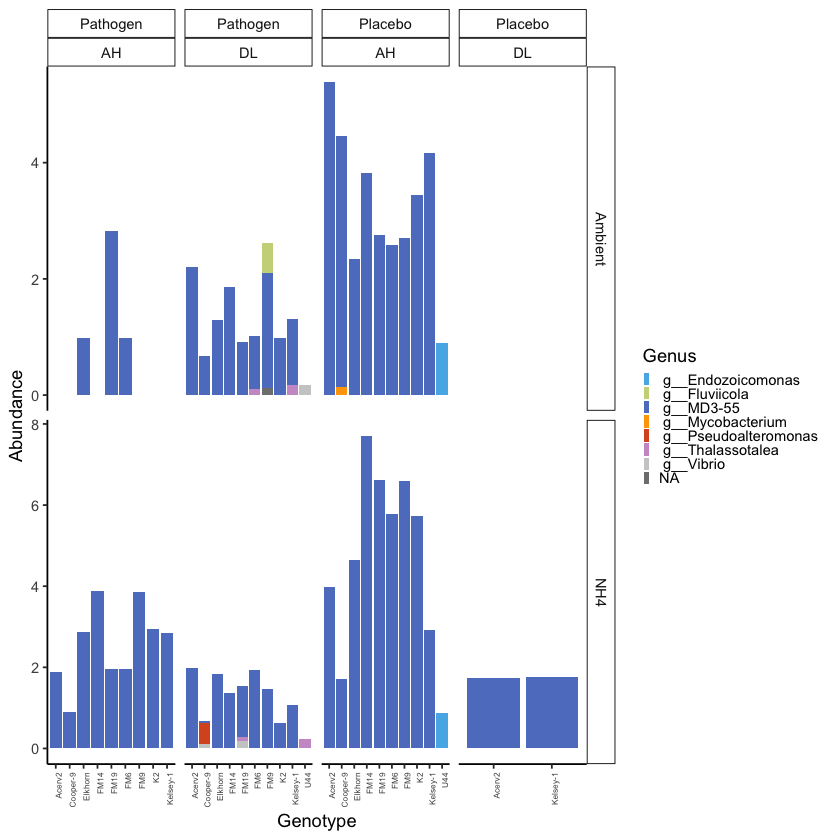

In [103]:
sum_ps_Clipped %>%
#filter(Order==" o__Rickettsiales") %>%
filter(Abundance >= 0.05) %>%
ggplot( 
       aes(x =Genotype, y=Abundance, fill=Genus)) + 
geom_bar(stat="identity",
         position="stack"
        ) +
facet_grid(Nutrients~Diseased*Health, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=5)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

ERROR while rich displaying an object: Error: Faceting variables must have at least one value

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste

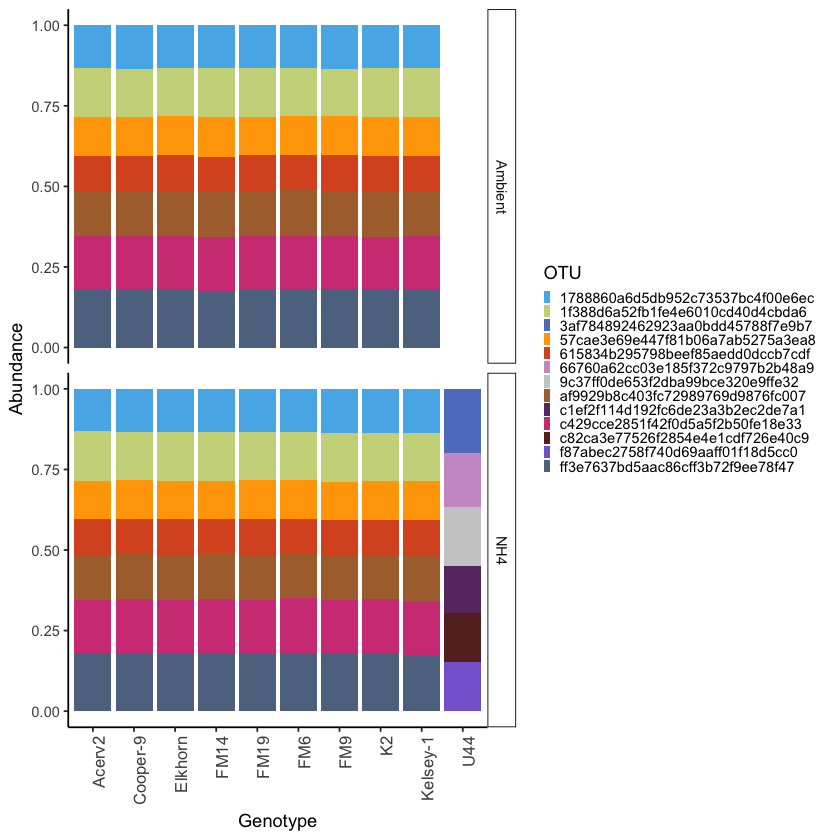

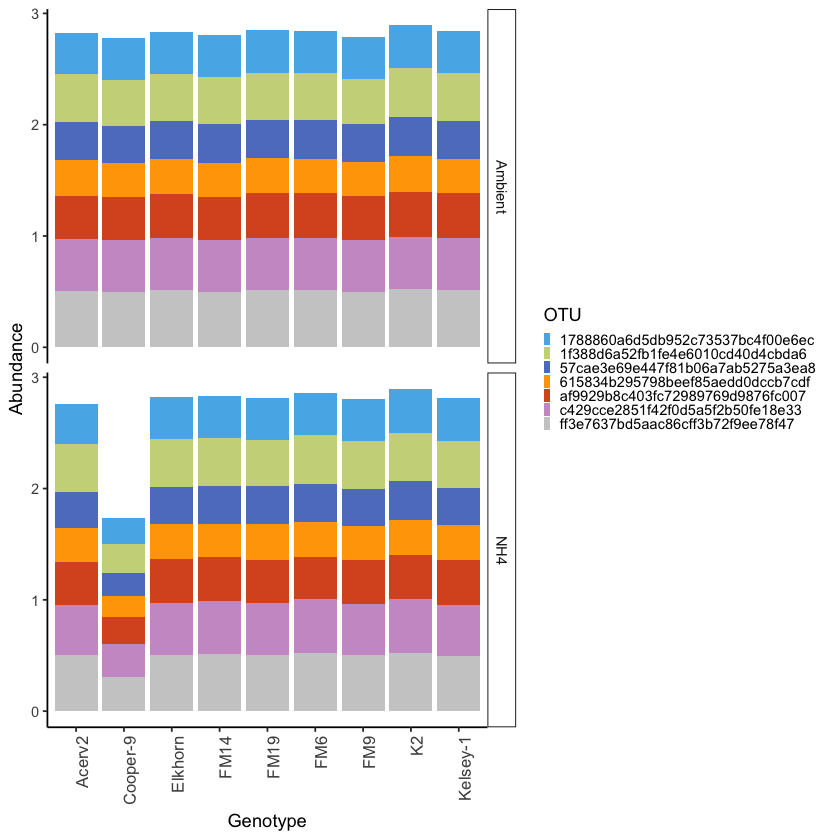

In [73]:
sum_ps_razor %>%
filter(Order!=" o__Rickettsiales") %>%
filter(Abundance >= 1) %>%
ggplot( 
       aes(x =ID, y=Abundance, fill=OTU)) + 
geom_bar(stat="identity",
        # position="fill"
        ) +
facet_grid(Nutrients~Genotype, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

sum_ps_razor %>%
#filter(Order!=" o__Rickettsiales") %>%
filter(Abundance >= 0.05) %>%
ggplot( 
       aes(x =Genotype, y=Abundance, fill=OTU)) + 
geom_bar(stat="identity",
         position="fill"
        ) +
facet_grid(Nutrients~., scales = "free", space="free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 


sum_ps_razor %>%
filter(Order==" o__Rickettsiales") %>%
filter(Abundance >= 0.015) %>%
ggplot( 
       aes(x =Genotype, y=Abundance, fill=OTU)) + 
geom_bar(stat="identity",
         position="stack"
        ) +
facet_grid(Nutrients~., scales = "free", space="free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

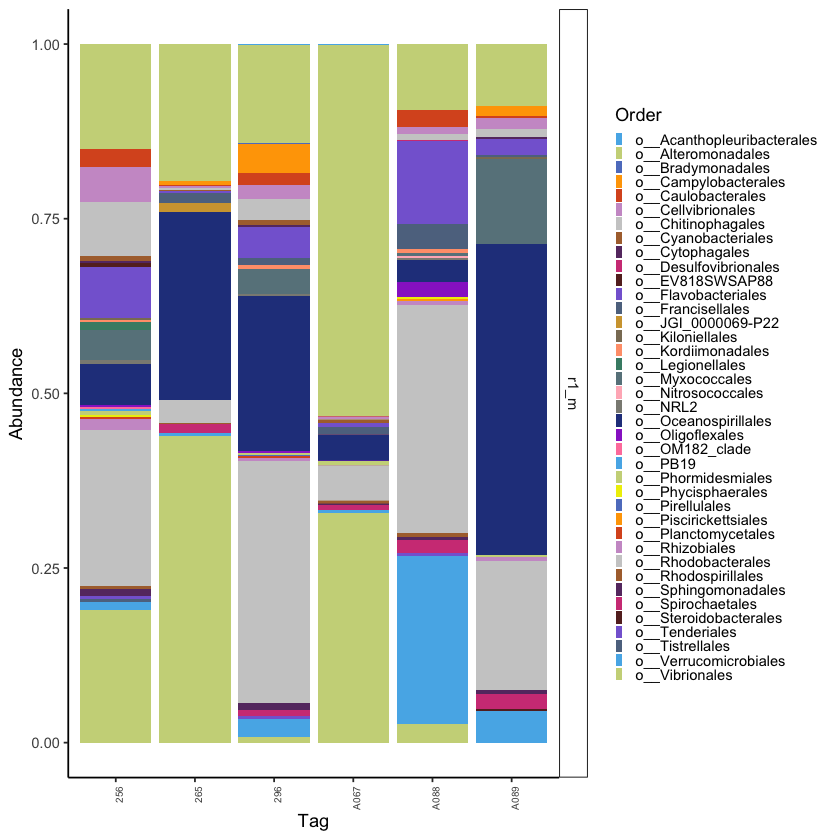

In [82]:
sum_ps_Clipped %>%
filter(Replicate!="NA") %>%
filter(Replicate!="r2_w") %>%
filter(Replicate!="r3_w") %>%
filter(Replicate!="r1_w") %>%
filter(Order!=" o__Rickettsiales") %>%
filter(Abundance >= 0.0005) %>%
ggplot( 
       aes(x =Tag, y=Abundance, fill=Order)) + 
geom_bar(stat="identity",
         position="fill"
        ) +
facet_grid(Replicate~., scales = "free", space="free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=6)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

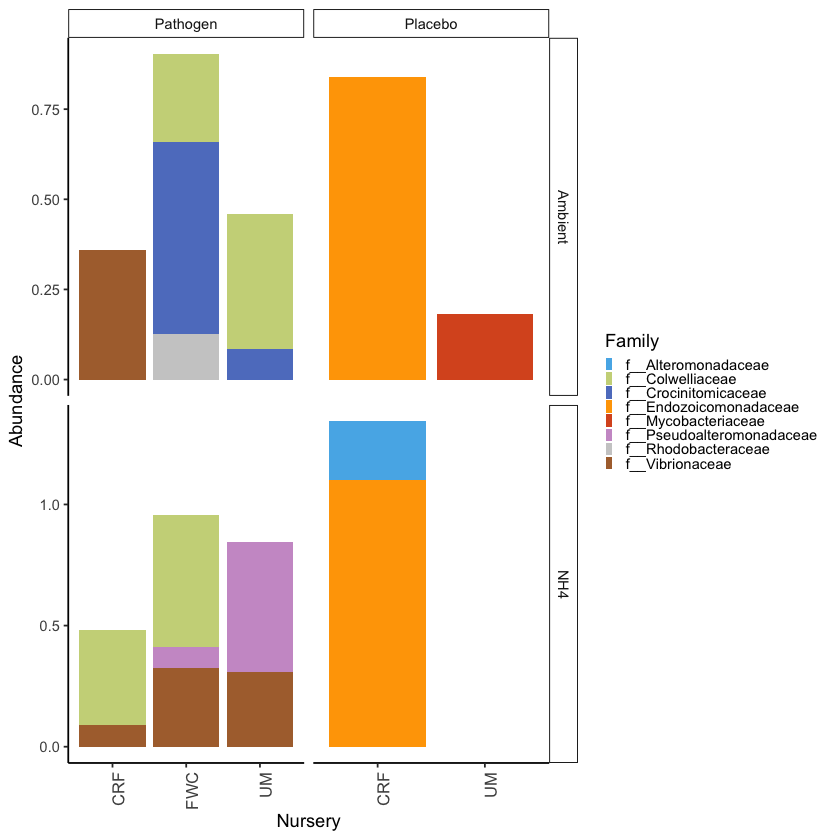

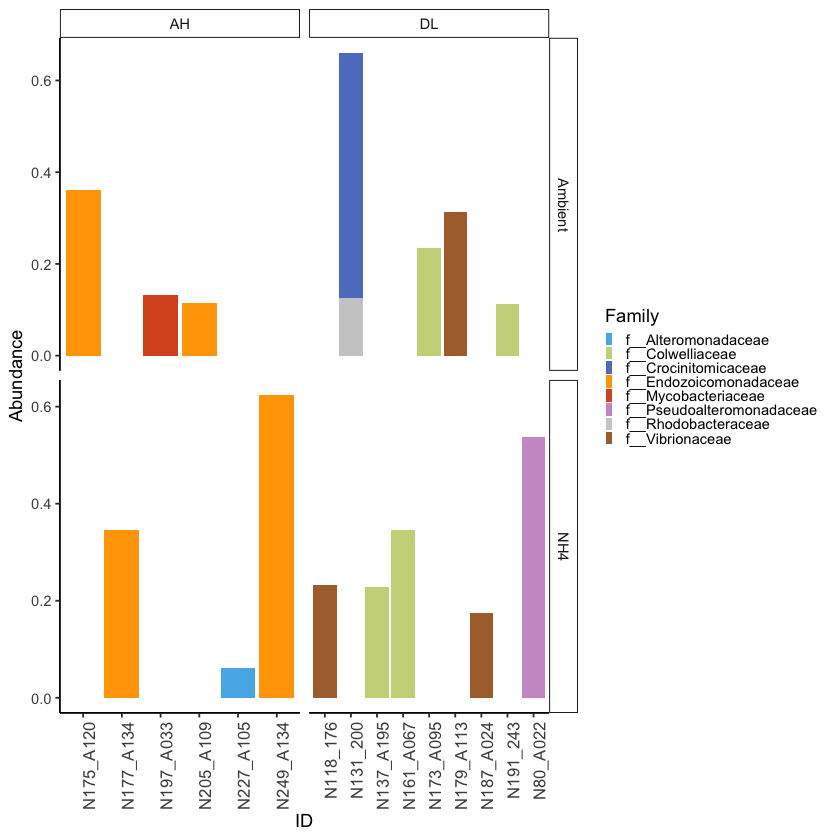

In [75]:
sum_ps_pair %>%
filter(Order!=" o__Rickettsiales") %>%
filter(Abundance >= 0.04) %>%
ggplot( 
       aes(x =Nursery, y=Abundance, fill=Family)) + 
geom_bar(stat="identity",
        # position="fill"
        ) +
facet_grid(Nutrients~Diseased, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 



sum_ps_pair %>%
filter(Order!=" o__Rickettsiales") %>%
filter(Abundance >= 0.05) %>%
ggplot( 
       aes(x =ID, y=Abundance, fill=Family)) + 
geom_bar(stat="identity",
        # position="fill"
        ) +
facet_grid(Nutrients~Health, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

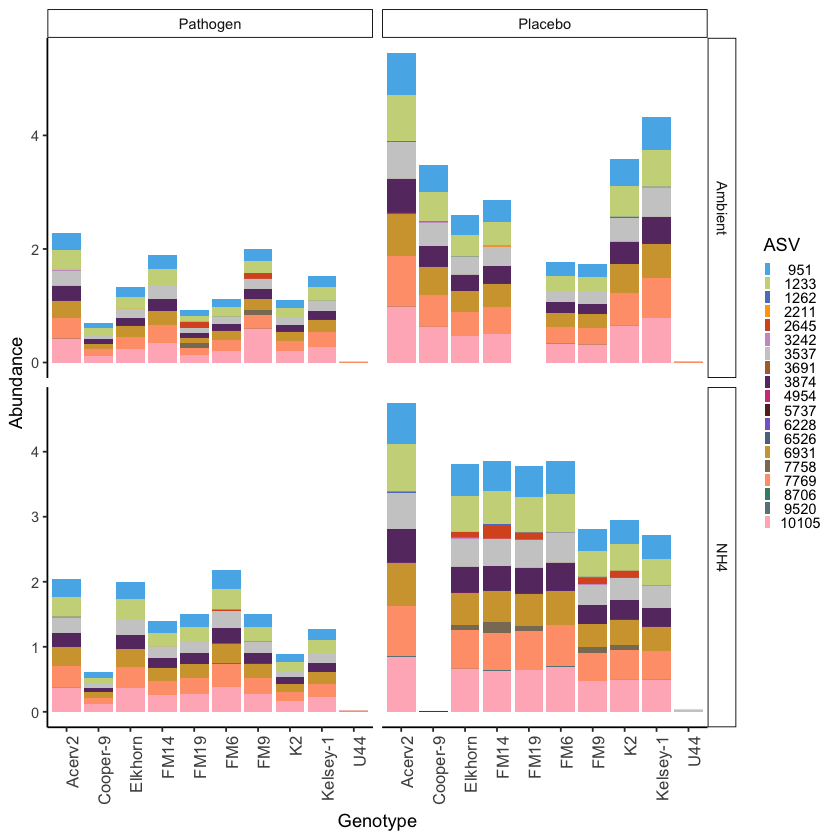

In [92]:
sum_ps_pair %>%
filter(Order==" o__Rickettsiales") %>%
filter(Abundance >= 0.001) %>%
ggplot( 
       aes(x =Genotype, y=Abundance, fill=ASV)) + 
geom_bar(stat="identity",
         position="stack"
        ) +
facet_grid(Nutrients~Diseased, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

In [96]:
sum_ps_pair %>%
filter(Order==" o__Rickettsiales") %>%
filter(Abundance >= 0.001) 

OTU,Sample,Abundance,feature.counts,Initial_sample_ID,Tag,Date_Collected,Replicate,Genotype,Nursery,⋯,X515FB_Forward_Primer,Primer_For_PCR,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASV
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ff3e7637bd5aac86cff3b72f9ee78f47,N131-200,0.3106646,650,131,200,6-Nov-20,NA,FM9,FWC,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCGCCGTACTTGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
ff3e7637bd5aac86cff3b72f9ee78f47,N190-261,0.1788187,26641,190,261,9-Nov-20,NA,FM6,FWC,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
ff3e7637bd5aac86cff3b72f9ee78f47,N85-A055,0.1784541,31470,85,A055,3-Nov-20,r1_w,Acerv2,UM,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
ff3e7637bd5aac86cff3b72f9ee78f47,N182-A069,0.1763646,32430,182,A069,8-Nov-20,r1_w,Elkhorn,UM,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
ff3e7637bd5aac86cff3b72f9ee78f47,N126-A154,0.1761314,32407,126,A154,6-Nov-20,r1_w,K2,CRF,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
ff3e7637bd5aac86cff3b72f9ee78f47,N107-162,0.1751962,56431,107,162,5-Nov-20,NA,K2,CRF,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
ff3e7637bd5aac86cff3b72f9ee78f47,N147-269,0.1751792,31930,147,269,6-Nov-20,r1_w,FM14,FWC,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCCAACCCAGATCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
ff3e7637bd5aac86cff3b72f9ee78f47,N96-231,0.1741258,36569,96,231,4-Nov-20,NA,FM6,FWC,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
ff3e7637bd5aac86cff3b72f9ee78f47,N121-A160,0.1738889,29131,121,A160,5-Nov-20,r1_w,K2,CRF,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTATATGTTCTCAATATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105


In [68]:
ps_homo_paired_DL_sub=subset_taxa(ps_homo_paired_DL, Order!=" o__Rickettsiales")

ps_homo_paired_DL_sub

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 8788 taxa and 57 samples ]
sample_data() Sample Data:       [ 57 samples by 37 sample variables ]
tax_table()   Taxonomy Table:    [ 8788 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 8788 tips and 7707 internal nodes ]

In [87]:
core_members(ps_homo_paired_DL_sub, detection = 1, prevalence = 70/100)

[1] "f242850c598d509ac98aea5999f2779f"

In [71]:
melt_homo_paired_DL= ps_homo_paired_DL %>%  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

In [30]:
melt_homo_paired_DL

,OTU,Sample,Abundance,sample_names,feature.counts,Initial_sample_ID,Tag,Date_Collected,Replicate,Genotype,⋯,X515FB_Forward_Primer,Primer_For_PCR,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASV
,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
600199,ff3e7637bd5aac86cff3b72f9ee78f47,N116-A058,6602,N116-A058,50041,116,A058,5-Nov-20,NA,Acerv2,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
600205,ff3e7637bd5aac86cff3b72f9ee78f47,N110-A045,6293,N110-A045,39551,110,A045,5-Nov-20,NA,Acerv2,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
600210,ff3e7637bd5aac86cff3b72f9ee78f47,N112-A005,6060,N112-A005,42758,112,A005,5-Nov-20,NA,Kelsey-1,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
460427,c429cce2851f42f0d5a5f2b50fe18e33,N116-A058,5899,N116-A058,50041,116,A058,5-Nov-20,NA,Acerv2,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,7769
460420,c429cce2851f42f0d5a5f2b50fe18e33,N110-A045,5886,N110-A045,39551,110,A045,5-Nov-20,NA,Acerv2,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,7769
460426,c429cce2851f42f0d5a5f2b50fe18e33,N112-A005,5640,N112-A005,42758,112,A005,5-Nov-20,NA,Kelsey-1,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,7769
73389,1f388d6a52fb1fe4e6010cd40d4cbda6,N110-A045,5608,N110-A045,39551,110,A045,5-Nov-20,NA,Acerv2,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTAGCCTTCGTCGCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,1233
600164,ff3e7637bd5aac86cff3b72f9ee78f47,N162-232,5597,N162-232,41133,162,232,6-Nov-20,NA,FM6,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCGCTGTGGATTATATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,10105
73358,1f388d6a52fb1fe4e6010cd40d4cbda6,N116-A058,5407,N116-A058,50041,116,A058,5-Nov-20,NA,Acerv2,⋯,GTGYCAGCMGCCGCGGTAA,AATGATACGGCGACCACCGAGATCTACACGCTCTACAGGGTCTCTATGGTAATTGTGTGYCAGCMGCCGCGGTAA,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rickettsiales,f__Fokiniaceae,g__MD3-55,NA,1233


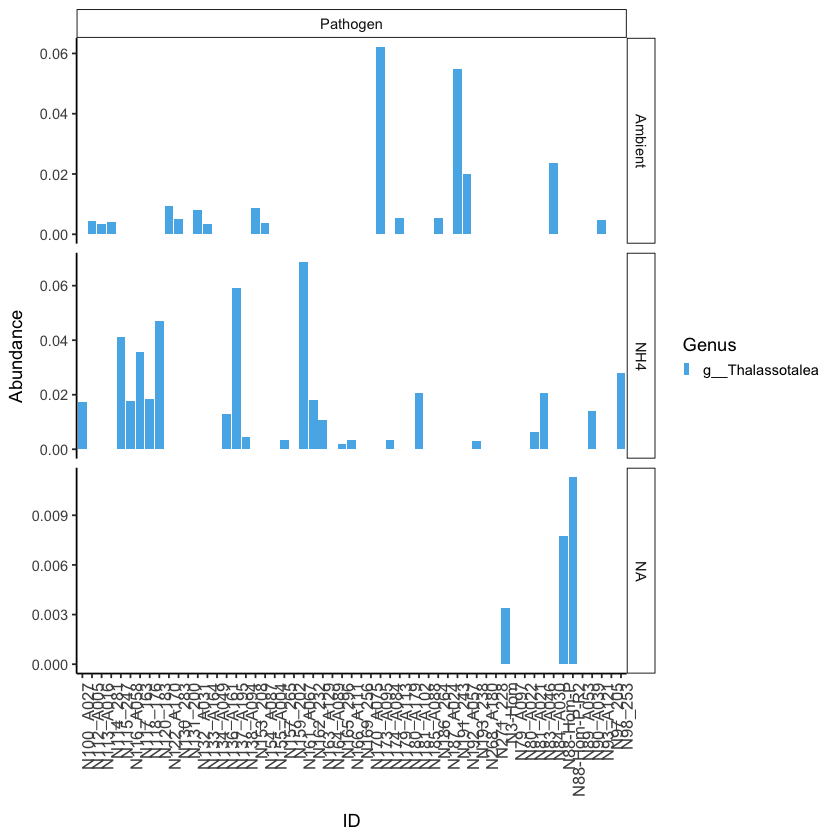

In [72]:

melt_homo_paired_DL %>%
filter(OTU=="f242850c598d509ac98aea5999f2779f") %>%
#filter(Abundance >= 0.00) %>%
ggplot( 
       aes(x =ID, y=Abundance, fill=Genus)) + 
geom_bar(stat="identity",
         position="stack"
        ) +
facet_grid(Nutrients~Diseased, scales = "free") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 

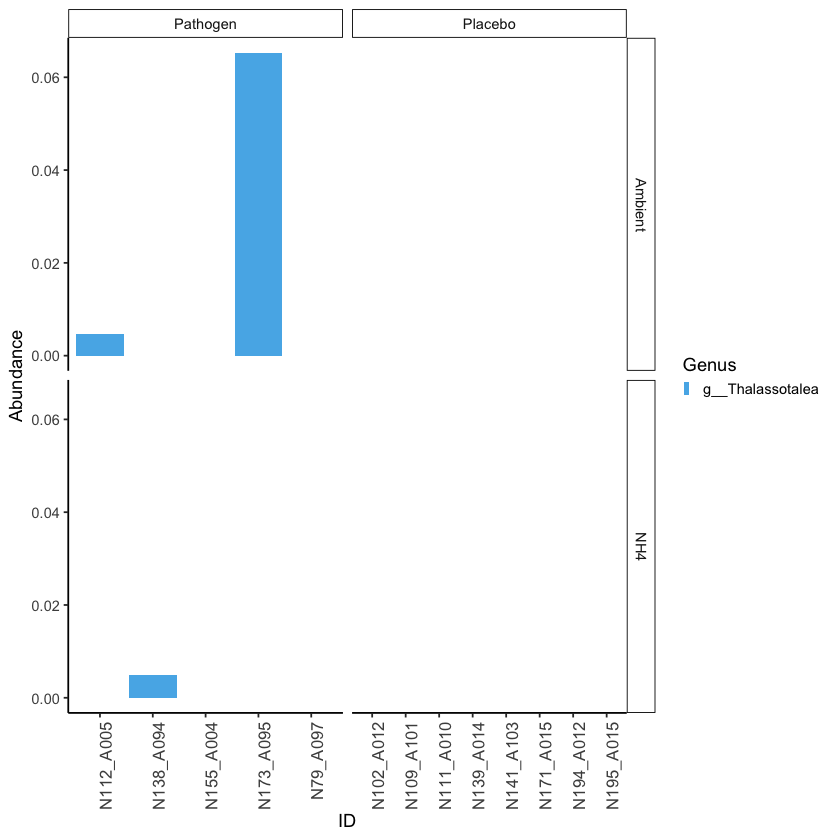

In [89]:

sum_ps_pair %>%
filter(OTU=="f242850c598d509ac98aea5999f2779f") %>%
filter(Genotype=="Kelsey-1") %>%
#filter(Abundance >= 0.00) %>%
ggplot( 
       aes(x =ID, y=Abundance, fill=Genus)) + 
geom_bar(stat="identity",
         position="stack"
        ) +
facet_grid(Nutrients~Diseased, scales = "free_x") +
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80",
                           "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", "#5E738F",
                          "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD", "blue", "red")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic() +

theme(axis.text.x = element_text(angle = 90, hjust = 1, size=10)) +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) 